# **4230 Project 1**


# **Question 1**


To simplify the original model equation let $S = α\widehat{S}, I = \lambda\widehat{I}, \text{and } t = β\widehat{t}$. Substituting these values into the orginal system, and noting that R(t) does not influence the behavior of either S(t) or I(t) and R(t) and can be solved for explicitly using the conservation law R(t) = 1 - S(t) - I(t), the system simplifies to:

$\frac{d(α\widehat{S})}{d(β\widehat{t})} = -τ(α\widehat{S})(λ\widehat{I})$
<br>$\frac{d(λ\widehat{I})}{d(β\widehat{t})} = τ(α\widehat{S})(λ\widehat{I}) - \frac{λ\widehat{I}}{\kappa}$

Multiplying ther first equation by $\frac{β}{α}$ and the second by $\frac{β}{λ}$ gives:

$\frac{d(\widehat{S})}{d(\widehat{t})} = \frac{β}{α}(-τ(α\widehat{S})(λ\widehat{I}))$
<br>$\frac{d(\widehat{I})}{d(\widehat{t})} = \frac{β}{λ}(τ(α\widehat{S})(λ\widehat{I}) - \frac{λ\widehat{I}}{\kappa})$

Let $\alpha = \frac{1}{\tau\kappa}, \lambda = \frac{1}{\tau\kappa}$, and $\beta = \kappa$, and the system simplifies to:

$\frac{d(\widehat{S})}{d(\widehat{t})} = -\widehat{S}\widehat{I}$
<br>$\frac{d(λ\widehat{I})}{d(β\widehat{t})} = (\widehat{S} - 1)\widehat{I}$

Using the definitions of S and I in terms of $\widehat{S} \text{and } \widehat{I}$ gives the domain of $\widehat{S} \text{and } \widehat{I}$ as $[0, \tau\kappa]$

# **Question 2**

Consider the system found in Question 1: $\widehat{D}\begin{bmatrix}
\widehat{S}\\
\widehat{I}
\end{bmatrix} = \begin{bmatrix}
-\widehat{S}\widehat{I}\\
(\widehat{S} - 1)\widehat{I}
\end{bmatrix}$

There will be an infinite number of fixed points for this system, all in the form (s, 0), where s is all possibles values of $\widehat{S}$. Qualitatively, this makes since, since the system will have no change when there are no infected individuals.

The Jacobian of this system will be $J = \begin{bmatrix}
-\widehat{I} & -\widehat{S}\\
\widehat{I} & \widehat{S} - 1
\end{bmatrix}$

When $\widehat{I} = 0$, this simplifies to $J = \begin{bmatrix}
0 & -\widehat{S}\\
0 & \widehat{S} - 1
\end{bmatrix}$, giving eigenvalues of $\lambda_1 = 0$ and $\lambda_2 = \widehat{S} - 1$
<br>When $\widehat{S} > 1$, the fixed point will be stable.
<br>When $\widehat{S} = 1$, this will be a degenerate case.
<br>When $\widehat{S} < 1$, stability will be displayed in the direction of the eigenvector $v_2 = \begin{bmatrix}
\frac{\widehat{S}}{\widehat{S} - 1}\\
1
\end{bmatrix}$.

These characteristics are displayed in the following phase portrait, where the critical points are located on the horizontal axis, where $\widehat{I} = 0$. The stability of these points changes with $\widehat{S}$ (horizontal axis). When $\widehat{S} > 1$ the points are unstable. The degenerate case can be seen at $\widehat{S} = 1$, and the stability of points along the corresponding eigenvector can be seen when $\widehat{S} < 1$.

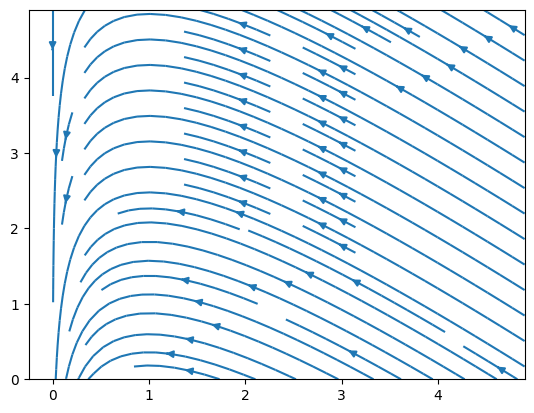

In [52]:
#tau = 1, k = 5
from pylab import *
xvalues, yvalues = meshgrid(arange(0, 5, 0.1), arange(0, 5, 0.1))
xdot = -xvalues * yvalues
ydot = (xvalues - 1) * yvalues
streamplot(xvalues, yvalues, xdot, ydot)
show()

# **Question 3**

In this quesion an ODE solver will be used to solve the original system (S(t), I(t), and R(t)). Then, experiments will be run with various parameters $\tau \text{ (the spread rate of the disease) and } \kappa$ (the recovery rate of the disease). The stopping condition for each experiment will be when the proportion of infected falls below $10^{-4}$.

In [6]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Helper function for the 3 graphs that will be made
def plot(t, z, title):
  plt.plot(t, z)
  plt.xlabel('t')
  plt.legend(['S', 'I', 'R'], shadow=True)
  plt.title(title)
  plt.show()

In [8]:
#Starting conditions for all three experiments
S0 = 0.99
I0 = 0.01
R0 = 0

In [9]:
#Function representing the given system of ODEs. To be used in scipy ODE solver
def SIR(t, z, tau, k):
  s, i, r = z
  return[-tau*s*i, tau*s*i-(i/k), i/k]

In [10]:
#A function for the stopping event for all three experiments (Percent of infected less than 10^-4)
#Set to terminal so the ODE solver will stop executing when this condition is reached
def stoppingEvent(t, i, tau, k):
  return i[1] - 0.001

stoppingEvent.terminal = True

The first experiment will be performed with $\tau = 0.8$ and $\kappa = 4$.

In [11]:
TAU = 0.8
K = 4

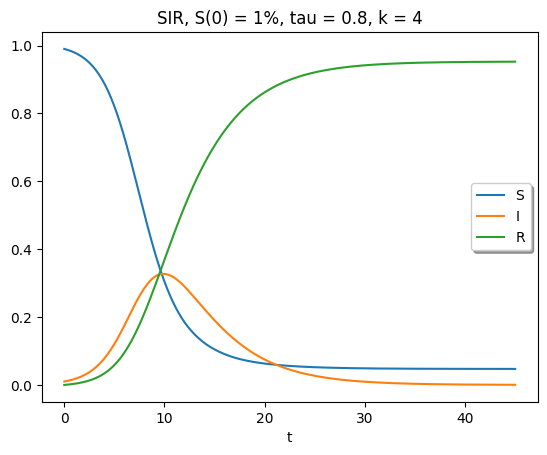

In [15]:
sol = solve_ivp(SIR, [0, 45], [S0, I0, R0], args=(TAU, K),
                dense_output=True, events = stoppingEvent)

t = np.linspace(0, 45, 300)
z = sol.sol(t)
plot(t, z.T, "SIR, S(0) = 0.99%, tau = 0.8, k = 4")

Here, with a recovery rate of 4 the peak of infected individuals stays below 40%. However, before the stopping condition is reached at a time of around 41, close to 95% of the original population will have been infected and eventually recovered.

The next experiment will be performed with $\tau = 0.4$ and $\kappa = 4$. Here, with the recovery rate the same as in the previous experiment and the spread rate half of what it was, it should be expected that the peak of infected individuals will be lower, and less individuals will be infected over the duration of the experiment.

In [34]:
TAU = 0.4
K = 4

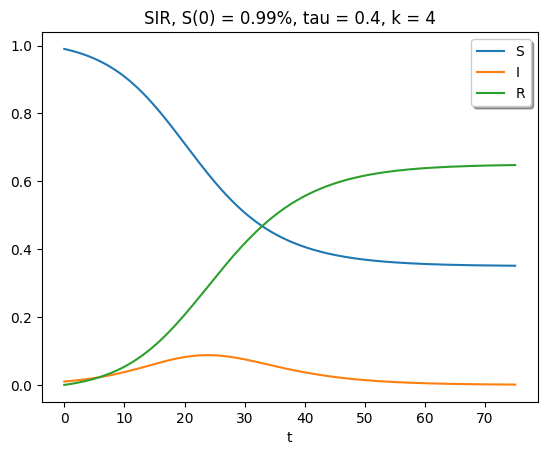

In [35]:
sol = solve_ivp(SIR, [0, 75], [S0, I0, R0], args=(TAU, K),
                dense_output=True, events = stoppingEvent)

t = np.linspace(0, 75, 300)
z = sol.sol(t)
plot(t, z.T, "SIR, S(0) = 0.99%, tau = 0.4, k = 4")

As expected, the lower spread rate led to a decrease peak of infected individuals, and when the stopping condition was reached only around 65% of the population had been infected. However, the changes to the infection rate led to the stopping condition not being reached until a time of nearly 75. This is most likely due to the fact that toward the end of the experiment there was still a significant portion of susceptible individuals, making it take longer for the number of infected to decrease to the stopping condition. The lower spread rate also led to the peak in infected population shifting to a later time.

In the last experiment, the infection rate will be changed back to 0.8, but with the recovery rate doubled to 8. Since higher values of the recovery rate parameter indicate longer recovery times, it would be expected for this experiment to show an increase in the peak of the infected population as compared to the first experiment.

In [37]:
TAU = 0.8
K = 8

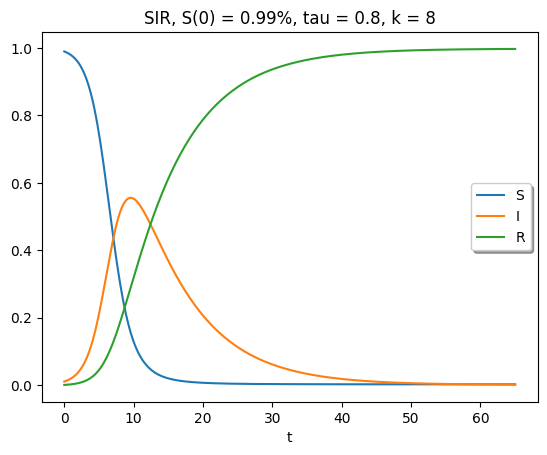

In [38]:
sol = solve_ivp(SIR, [0, 65], [S0, I0, R0], args=(TAU, K),
                dense_output=True, events = stoppingEvent)

t = np.linspace(0, 65, 300)
z = sol.sol(t)
plot(t, z.T, "SIR, S(0) = 0.99%, tau = 0.8, k = 8")

As expected, the infected population peaks at a higher percentage than in the first experiment. This experiment also last longer than the first, with the stopping condition not occuring until a time of 63. At the end of the experiment, nearly the entire population has been infected and recovered.

These three experiments indicate that a higher sprerad rate and recovery time will both lead to higher peaks in the infected population, with the spread rate having the most noticable effect on when the peak occurs. A decrease in spread rate leads to a lower peak in infected individuals, and a lower percentage of the overall population becoming infected at any time, but makes the disease stay prominent in the population for longer. An increase in recovery time leads to a higher peak in infected, and higher percentage of the population eventually becoming infected, and makes the disease stay in the population for longer.

#**Question 4**

In this question, a varity of values of $\tau \in (0,4]$ and $\kappa \in [1, 5]$ will be used to analyze the stopping times of the simulations. The stopping condition will be when the infected population falls below $10^{-4}$.

In [44]:
TAU = np.linspace(4, 0, 10, endpoint=False)[::-1]
K = np.linspace(1, 5, 10)

In [49]:
X, Y = np.meshgrid(TAU, K)
t_events_array = np.empty_like(X)
for i in range(len(TAU)):
    for j in range(len(K)):
        sol = solve_ivp(SIR, [0, 150], [S0, I0, R0], args=(X[i, j], Y[i, j]),
                        dense_output=True, events=stoppingEvent)
        t_events_array[i, j] = sol.t_events[0][0]

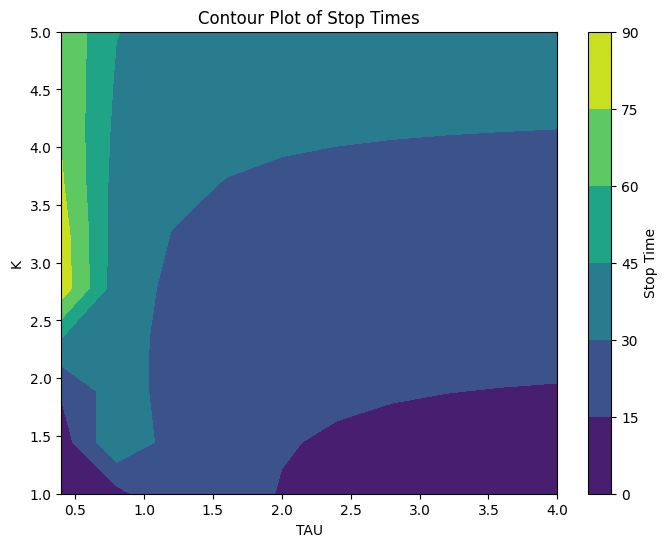

In [50]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, t_events_array)
plt.colorbar(contour, label='Stop Time')
plt.xlabel('TAU')
plt.ylabel('K')
plt.title('Contour Plot of Stop Times')
plt.show()

This contour plot indicates that a higher spread rate tends to decrease the stopping time of the simulation (excluding low spread rates and low recover times, where enough people do not become infected for the disease to last in the population). This would be expected, as the faster the portion of the susceptible population becomes infected that will become infected, the faster the infected can begin recovering and the number of infected can approach zero.
<br>The plot also indicated that a slower recovery time increases the stopping time of the simulation. With a specific value for the infection rate, the slower the infected population recovers, the slower the number of infected can decrease. Additionally, when the infected population recovers more slowly, there will tend to be more infected at any one time.